In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])

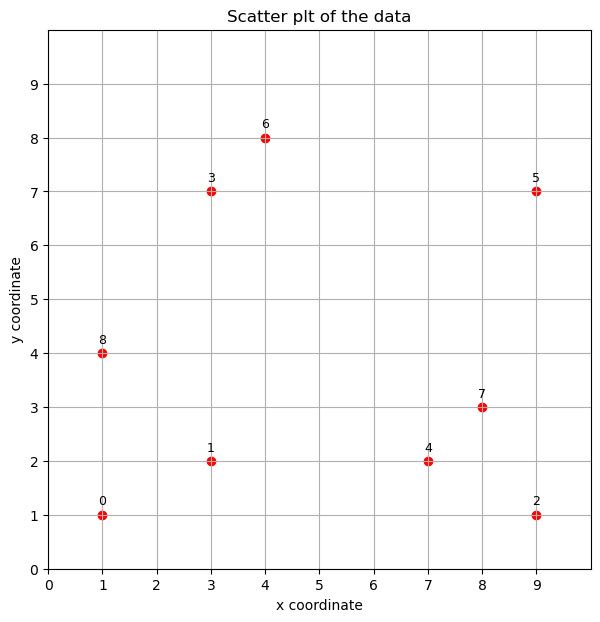

In [3]:
plt.figure(figsize=(7,7))

#print(X1[:,0])
#print(X1[:,1])
#print(X1.shape[0])

plt.scatter(X1[:,0], X1[:,1], c='red')

for i in range(X1.shape[0]):
    plt.annotate(
        text=str(i),
        xy=(X1[i,0], X1[i,1]),        # point to annotate, in data coords
        xytext=(0, 5),                # offset the text by 5 points above
        textcoords='offset points',   # interpret xytext in “points” offset
        ha='center',                  # horizontal alignment
        va='bottom',                  # vertical alignment
        fontsize=9
    )

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter plt of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid(True)
plt.show()

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')

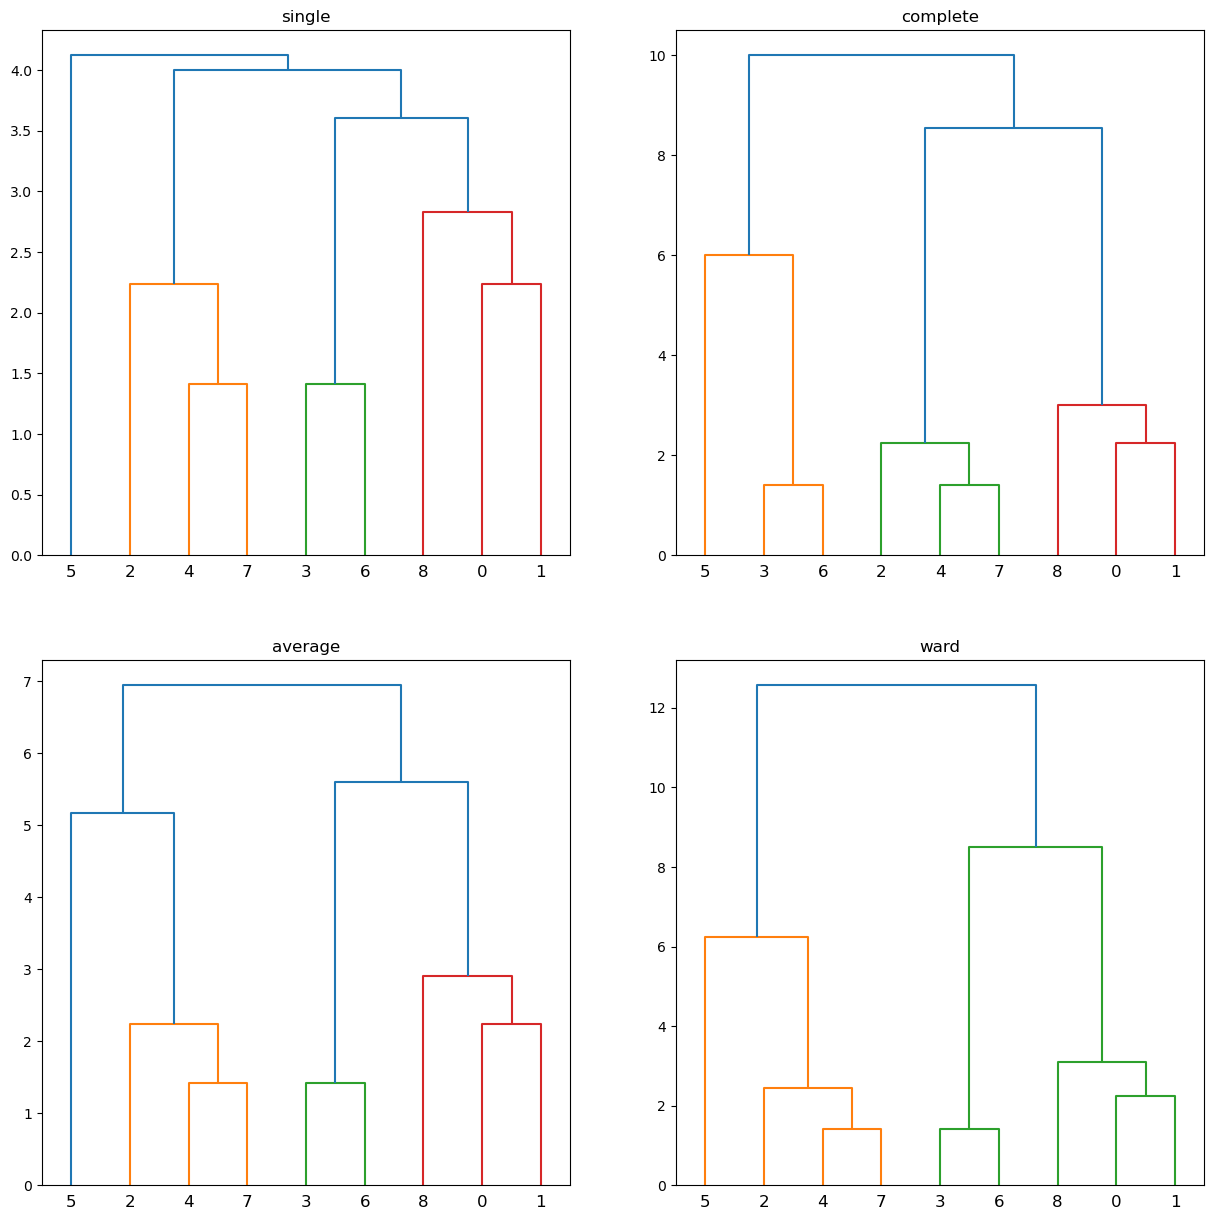

In [5]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1), dendrogram(Z1), plt.title('single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('ward')

plt.show()

In [6]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 2, criterion='maxclust')

print(f'Clusters: {f1}')

Clusters: [2 2 1 2 1 1 2 1 2]


In [7]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)

[0 0 1 0 1 1 0 1 0]


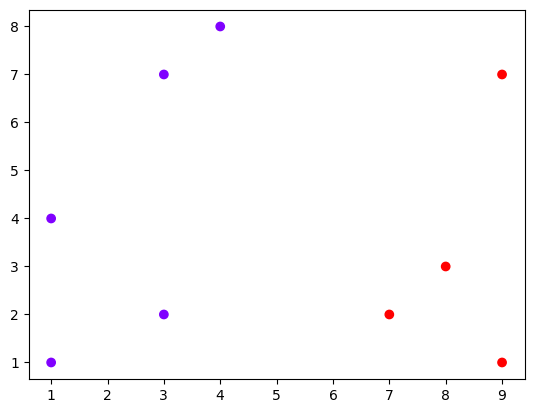

In [8]:
plt.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow')